In [3]:
import numpy as np

In [4]:
import os

In [5]:
import ntpath

In [6]:
import sys 
import os
#sys.path.append(os.path.abspath("/home/pcs/patrick/Dokumente/Github/colormap/"))
sys.path.append(os.path.abspath("C:\Users\User\Documents\GitHub\colormap"))
sys.path.append(os.path.abspath("C:\Users\User\Documents\GitHub\qkit"))
sys.path.append(os.path.abspath("C:\Users\User\Documents\GitHub\KIT_Cudi"))
import colormaps as cmaps


In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col

In [8]:
from matplotlib.ticker import FormatStrFormatter

In [9]:
import numpy as np
import scipy.constants as cs
import scipy.special as ss
from matplotlib import pyplot as plt
from matplotlib import cm
from qkit.gui.notebook.Progress_Bar import Progress_Bar as pb
from scipy.integrate import dblquad
from scipy import integrate

%matplotlib inline

In [10]:
from cQED.power_spec import power_spec as ps

In [11]:
from cQED.cpw_resonator import cpw_resonator as cpw

In [12]:
from qkit.analysis import dat_reader as dat

In [13]:
from qkit.analysis.resonator import Resonator as Resonator

In [14]:
from qkit.analysis.circle_fit.circuit import reflection_singleport as rf_p

In [15]:
from qkit.analysis.circle_fit.utilities import plotting, save_load, Watt2dBm, dBm2Watt

In [16]:
from qkit.storage import hdf_lib

In [17]:
from tvregdiff import TVRegDiff as tv

In [18]:
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage.filters import median_filter

In [19]:
import random

In [20]:
#customized plots:
import matplotlib 
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
matplotlib.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 21}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (8.0,5.0)
matplotlib.rcParams['savefig.dpi'] = 200
matplotlib.rcParams['legend.shadow'] = False
matplotlib.rcParams['savefig.bbox'] = 'tight'


cmap_virdis = cmaps.viridis.colors

labelsize = 27

In [21]:
startcolor        =   'black'
midcolor          =   'blue'
endcolor          =   'white'

In [22]:
c_cmap = col.LinearSegmentedColormap.from_list('olive',[startcolor,midcolor,endcolor], N = 256, gamma = 1.0)
cm.register_cmap(cmap = c_cmap)

In [24]:
import scipy.special as ss
import scipy.constants as sc


phi_0 = sc.physical_constants['magn. flux quantum'][0]
c = sc.physical_constants['speed of light in vacuum'][0]   
h = sc.h
hbar = sc.h/(2*np.pi)
e = sc.e 
R_k = h/e**2

In [69]:

#circlepath = r"C:\Users\User\Documents\PhD\Interferrometer\Combiners\104227_Combiner_mini_circuits_ZX10_2_183_Splus_S_to_2\104227_Combiner_mini_circuits_ZX10_2_183_Splus_S_to_2.h5"
#circlepath1 = r"C:\Users\User\Documents\PhD\Interferrometer\Combiners\104605_Combiner_mini_circuits_ZX10_2_183_Splus_1_to_2\104605_Combiner_mini_circuits_ZX10_2_183_Splus_1_to_2.h5"
#circlepath2 = r"C:\Users\User\Documents\PhD\Interferrometer\Combiners\104826_Combiner_mini_circuits_ZX10_2_183_Splus_S_to_1\104826_Combiner_mini_circuits_ZX10_2_183_Splus_S_to_1.h5"
#circlepath3 = r"C:\Users\User\Documents\PhD\Interferrometer\Combiners\105331_Combiner_mini_circuits_ZX10_2_183_Splus_1_to_2\105331_Combiner_mini_circuits_ZX10_2_183_Splus_1_to_2.h5"

circlepath = r"C:\Users\User\Documents\PhD\Interferrometer\Combiners\105837_Combiner_Marki_Microwave_PD0R618_I_to_O1\105837_Combiner_Marki_Microwave_PD0R618_I_to_O1.h5"
circlepath1 = r"C:\Users\User\Documents\PhD\Interferrometer\Combiners\110209_Combiner_Marki_Microwave_PD0R618_O1_to_O2\110209_Combiner_Marki_Microwave_PD0R618_O1_to_O2.h5"
circlepath2 = r"C:\Users\User\Documents\PhD\Interferrometer\Combiners\111523_Combiner_Marki_Microwave_PD0R618_O1_to_O2\111523_Combiner_Marki_Microwave_PD0R618_O1_to_O2.h5"



In [70]:
data = hdf_lib.Data(path = circlepath)
data1 = hdf_lib.Data(path = circlepath1)
data2 = hdf_lib.Data(path = circlepath2)
#data3 = hdf_lib.Data(path = circlepath3)

In [71]:
freq = np.array(data['/entry/data0/frequency'])
amplitude = np.array(data['/entry/data0/amplitude'])
phase = np.array(data['/entry/data0/phase'])

z_data_raw = np.array(amplitude*np.exp(1j*phase))

In [72]:
#power = np.array(data['/entry/data0/vna power'])

In [73]:
freq1 = np.array(data1['/entry/data0/frequency'])
amplitude1 = np.array(data1['/entry/data0/amplitude'])
phase1 = np.array(data1['/entry/data0/phase'])


#z_data_raw2 = np.array(amplitude2*np.exp(1j*phase2))

freq2 = np.array(data2['/entry/data0/frequency'])
amplitude2 = np.array(data2['/entry/data0/amplitude'])
phase2 = np.array(data2['/entry/data0/phase'])

#z_data_raw2 = np.array(amplitude2*np.exp(1j*phase2))

freq3 = np.array(data3['/entry/data0/frequency'])
amplitude3 = np.array(data3['/entry/data0/amplitude'])
phase3 = np.array(data3['/entry/data0/phase'])

#z_data_raw2 = np.array(amplitude2*np.exp(1j*phase2))'''

In [74]:
#power.shape

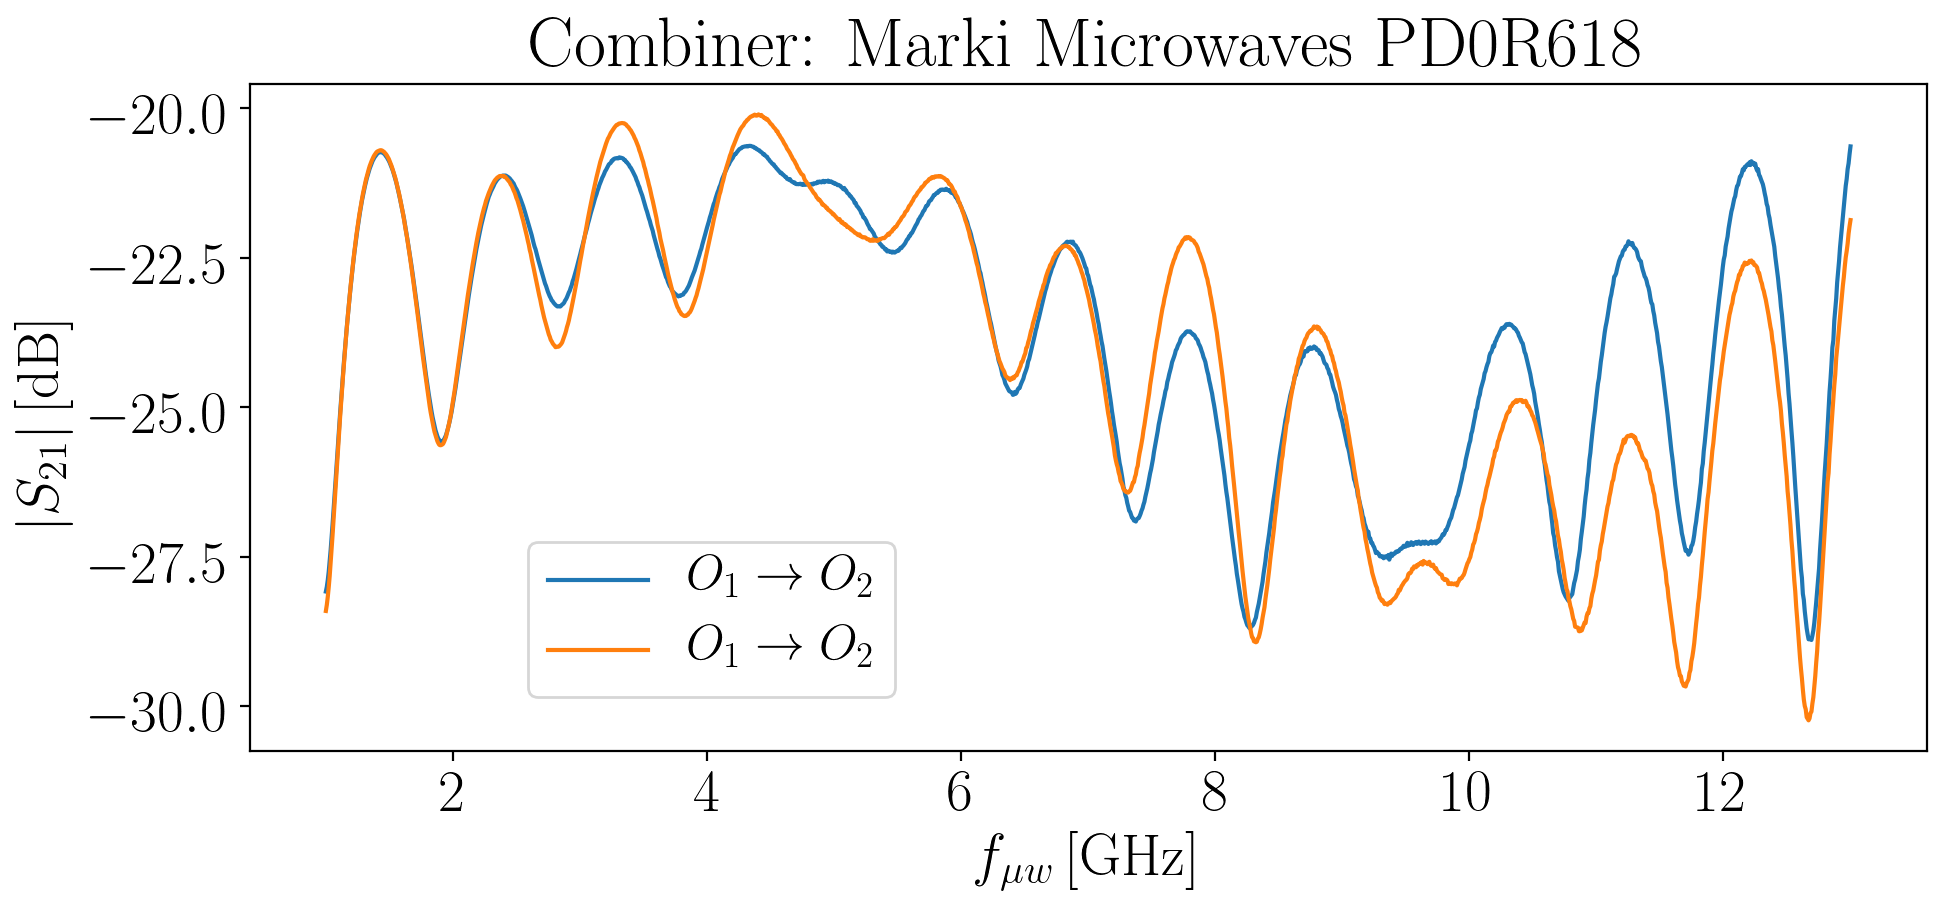

In [83]:
fig, ax = plt.subplots(figsize = (10,5))
#ax.plot(freq*10**-9, 20*np.log10(amplitude), label = '1 to 3 ', color = 'red' )
#ax.plot(freq*10**-9, 20*np.log10(amplitude1), label = '3 to 2 ', color = 'orange')
#ax.plot(freq*10**-9, 20*np.log10(amplitude2), label = '2 to 1 ', color = 'blue')
i = 0
ax.plot(freq*10**-9, 20*np.log10(amplitude1), label = r'$O_1 \rightarrow O_2$')
ax.plot(freq*10**-9, 20*np.log10(amplitude2), label = r'$O_1 \rightarrow O_2$')
#for p in power:
#    if i>4:
#        ax.plot(freq*10**-9, 20*np.log10(amplitude[i]), label = r'$P_{{L.O.}}\,\,=\,\,{}\,\mathrm{{dBm}}$'.format(p))
#    i +=1
#ax.set_title(r'Marki Microwaves M1-0212LA ')
#ax.set_title(r'Marki Microwaves SSB0618-LXW-1 ')
#ax.set_title(r'Combiner: Mini Circuits ZX10-2-183-S+')
ax.set_title(r'Combiner: Marki Microwaves PD0R618')
#ax.set_title(r'Circulator H03S01 - SN: 16288013')
#ax.plot(freq2*10**-9, 20*np.log10(amplitude2), label = 'screw pos. 2')
ax.set_xlabel(r'$f_{\mu w}\,\mathrm{[GHz]}$')
ax.set_ylabel(r'$|S_{21}|\,\mathrm{[dB]}$')
#ax.text(1,-15, r'$\mathrm{L.O.}\,\,\rightarrow\,\,\mathrm{IF}$')
#ax.axhline(-10,ls = '--', color = 'black', lw = 1)
#ax.set_ylim(-50,-10)
ax.legend(loc = 'upper right', ncol = 1, bbox_to_anchor = (0.40, 0.35), fontsize = 18)
fig.tight_layout()

In [113]:
#fig.savefig('waveguide_S11.png')

In [133]:
#fig.savefig('Marki_Microwaves_M1-0212LA_LO_to_IF_powersweep_7_to_10dBm.png', dpi = 300, bbox_inches = 'tight')
#fig.savefig('Marki_Microwaves_SSB0618L-LXW-1_LO_to_IF_powersweep.png', dpi = 300, bbox_inches = 'tight')
#fig.savefig('Circulator_H03S01_SN16288013_Isolation.png', dpi = 300, bbox_inches = 'tight')

In [84]:
#fig.savefig('Mini_circuits_ZX10_2_183_Splus_1_to_2(2).png', dpi = 300, bbox_inches = 'tight')
fig.savefig('Marki_Microwave_PD0R618_O1_O2.png', dpi = 300, bbox_inches = 'tight')